<a href="https://colab.research.google.com/github/kerenslendyrc/Estadistica/blob/main/EstadisticaDescriptivaP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadistica descriptiva para variables cualitativas


*   Graficos para datos univariados cualitativos
*   Proporciones asociadas a los valores de una variable cualitativa




In [1]:
from google.colab import files
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [2]:
import pandas as pd
import io #paquete de python
tabla = pd.read_csv(io.BytesIO(uploaded['nac2020.csv']),sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,2,9,9,2020,4,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [3]:
tabla1= tabla[["EDAD_MADRE","TALLA_NAC","T_GES"]]
tabla1.head(4)

,EDAD_MADRE,TALLA_NAC,T_GES
COD_DPTO,,,
44,4,9,6
44,4,9,6
44,5,9,6
44,5,9,6


In [4]:
#eliminar los valores que no tenemos información
df2 = tabla1[(tabla1.EDAD_MADRE < 99) & (tabla1["TALLA_NAC"] != 9) & (tabla1["T_GES"] != 9)]
df2.head(4)

,EDAD_MADRE,TALLA_NAC,T_GES
COD_DPTO,,,
52,5,4,4
20,4,5,4
27,3,5,4
27,5,4,4


In [5]:
df2.EDAD_MADRE.head(2)
#int64-> enteros(cuantitativa). Toca pasarla a string para que sea cualitativa

COD_DPTO
52    5
20    4
Name: EDAD_MADRE, dtype: int64

In [6]:
df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)

<ipython-input-6-cb03623b34b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


In [12]:
df2.T_GES = df2.T_GES.astype(str)

<ipython-input-12-a0eccb8a8f1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


In [13]:
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)

<ipython-input-13-e1c6521e0c23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


In [7]:
df2.loc[(df2.EDAD_MADRE == "1"), "EDAD_MADRE"] = "10-14"
df2.loc[(df2.EDAD_MADRE == "2"), "EDAD_MADRE"] = "15-19"
df2.loc[(df2.EDAD_MADRE == "3"), "EDAD_MADRE"] = "20-24"
df2.loc[(df2.EDAD_MADRE == "4"), "EDAD_MADRE"] = "25-29"
df2.loc[(df2.EDAD_MADRE == "5"), "EDAD_MADRE"] = "30-34"
df2.loc[(df2.EDAD_MADRE == "6"), "EDAD_MADRE"] = "35-39"
df2.loc[(df2.EDAD_MADRE == "7"), "EDAD_MADRE"] = "40-44"
df2.loc[(df2.EDAD_MADRE == "8"), "EDAD_MADRE"] = "45-49"
df2.loc[(df2.EDAD_MADRE == "9"), "EDAD_MADRE"] = "50-55"
df2.loc[(df2.EDAD_MADRE == "99"), "EDAD_MADRE"] = "SD"


<ipython-input-8-c284575c75b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


<BarContainer object of 9 artists>

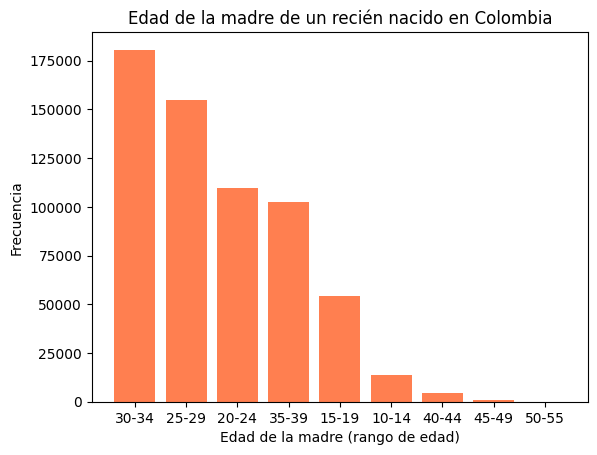

In [8]:
#Diagrama de barras de edad de la madre (corresponde a una cualitativa)
# x los valores de edad de madre y en el y los conteos de esos valores, tolist
# es para que deje de ser un arreglo y se vuelva una lista
import matplotlib.pyplot as plt

df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)
x_values = df2.EDAD_MADRE.unique()
y_values = df2.EDAD_MADRE.value_counts().tolist()
plt.title('Edad de la madre de un recién nacido en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Edad de la madre (rango de edad)')
ax.set_ylabel('Frecuencia')
plt.bar(x_values, y_values, color="coral")


El valor 4 (25-29 años) es le rango de edad donde se tiene alrededor de 175000 madres de recién nacidos de colombia. En el rango de edad 5 (30-34 años) se tienen aproximadamente 50000 madres de recien nacidos en Colombia.
Los rango de edades 1(10-14 años),7(40-44años),8 (45-49 años) y 9 (50-54 años) tienen menos de 25000 madres de recien nacidos en Colombia

In [49]:
# Obtener los recuentos de cada valor único en la columna 'T_GES'
tges_counts = df2['T_GES'].value_counts()

# Mostrar los recuentos de cada categoría
print(tges_counts)


T_GES
38-41          485426
28-37          130484
22-27            2236
ignorado         1461
42 o más         1163
Menos de 22        28
Name: count, dtype: int64


<ipython-input-55-94839116d96b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['T_GES'] = df2['T_GES'].astype(str)


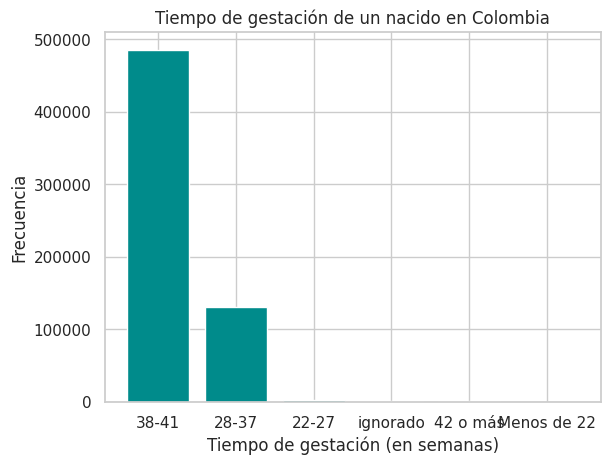

In [55]:
# Mapear los valores de 'T_GES' a las etiquetas deseadas
df2.loc[(df2.T_GES == "1"), "T_GES"] = "Menos de 22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"] = "38-41"
df2.loc[(df2.T_GES == "5"), "T_GES"] = "42 o más"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "ignorado"

# Convertir la columna 'T_GES' a strings si es necesario
df2['T_GES'] = df2['T_GES'].astype(str)

# Obtener los recuentos de cada valor único en la columna 'T_GES'
tges_counts = df2['T_GES'].value_counts()

# Obtener los valores únicos y sus frecuencias
x_values = tges_counts.index.tolist()
y_values = tges_counts.tolist()

# Graficar los datos
plt.title('Tiempo de gestación de un nacido en Colombia')
plt.xlabel('Tiempo de gestación (en semanas)')
plt.ylabel('Frecuencia')
plt.bar(x_values, y_values, color="darkcyan")
plt.show()




El tiempo que comprende las 38 a 41 semanas es el rango donde se tienen aproximadamente 500000 nacidos, el tiempo que comprende las 28-37 semanas hay aproximadamente 130000 nacidos, así mismo, el tiempo de 22-27 semanas hay aproximadamente 2000 nacidos

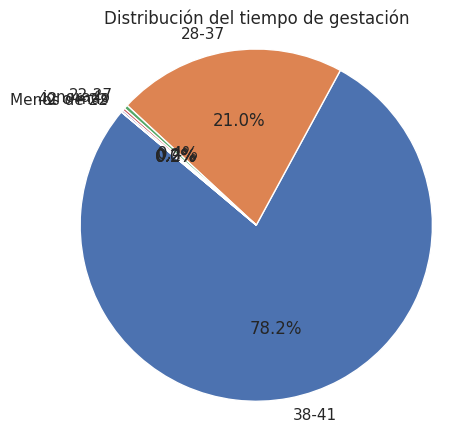

In [56]:
# Calcular los valores únicos de "T_GES" y sus frecuencias en diagrama circular
tges_counts = df2['T_GES'].value_counts()

# Obtener los valores únicos y sus frecuencias
x_values = tges_counts.index.tolist()
y_values = tges_counts.tolist()

# Crear el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(y_values, labels=x_values, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del tiempo de gestación')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()



In [16]:
# TALLA DEL NACIDO
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "Menos de 20"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60 y más"

<ipython-input-17-f0757f3b0063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


<BarContainer object of 6 artists>

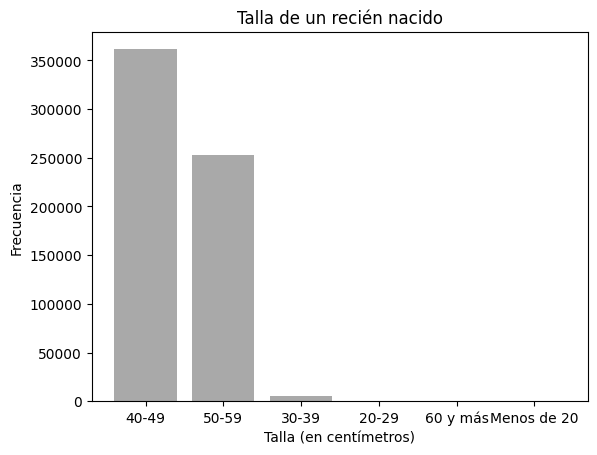

In [17]:
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.title('Talla de un recién nacido')
ax = plt.subplot()  # Axis
ax.set_xlabel('Talla (en centímetros)')
ax.set_ylabel('Frecuencia')
plt.bar(x_values, y_values, color="darkgray")

La talla que comprende de 40 a 49 centímetros fue la talla de aproximadamente 350000 nacidos en Colombia y la talla de 50 a 59 centímetros fue la talla de aproximadamente 250000 nacidos en Colombia

In [43]:
import numpy as np
sizes = np.array(y_values)
sizes

array([485426, 130484,   2236,   1461,   1163,     28])

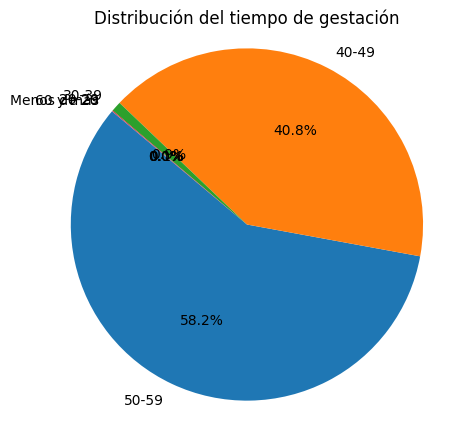

In [29]:
# Calcular los valores únicos de "T_GES" y sus frecuencias en diagrama circular.
tges_counts = df2['TALLA_NAC'].value_counts()

# Obtener los valores únicos y sus frecuencias
x_values = tges_counts.index.tolist()
y_values = tges_counts.tolist()

# Crear el gráfico circular
plt.figure(figsize=(5, 5))
plt.pie(y_values, labels=x_values, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del tiempo de gestación')
plt.axis('equal')  # Asegura que el gráfico sea un círculo en lugar de una elipse
plt.show()


In [44]:
len(df2.T_GES)

620798

In [45]:
len(df2.TALLA_NAC)

620798

In [32]:
#Calcular porcentajes, para todos los valores de x que están en el elemento y
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values]
print(x_values)
print(porcentaje)

['50-59', '40-49', '30-39', '20-29', '60 y más', 'Menos de 20']
[58.21958189298291, 40.7639844200529, 0.9207503890154286, 0.07683658774673888, 0.018524544215670798, 0.00032216598635949215]


Aproximadamente el 58.22% de los recién nacidos en Colombia tienen una talla de entre 50 y 59 centímetros, el 40.76% tienen una talla entre 40 y 49 centímetros, el 0.92% tienen una talla entre 30 y 39 centímetros, el 0.08% tienen una talla entre 20 y 29 centímetros, el 0.02% tienen una talla de 60 centímetros o más, y el 0.00% tienen una talla de menos de 20 centímetros

In [47]:
# Contar el número de filas que no tienen valores nulos en la columna 'T_GES'
total_validos = len(df2.T_GES)

# Calcular los porcentajes relativos a la columna "T_GES" utilizando el número total de filas válidas como denominador
porcentaje = [(x / total_validos * 100) for x in y_values]

# Mostrar los valores únicos de "T_GES" y sus porcentajes
print(x_values)
print(porcentaje)


['38-41', '28-37', '22-27', 'ignorado', '42 o más', 'Menos de 22']
[78.19387304727141, 21.018753282065987, 0.3601815727499122, 0.23534225303560902, 0.18733952106804466, 0.004510323809032889]


Aproximadamente el 78.19% de los nacidos en Colombia tienen un tiempo de gestación de 38 a 41 semanas, el 21.02% tienen un tiempo de gestación de 28 a 37 semanas, el 0.36% tienen un tiempo de gestación de 22 a 27 semanas, el 0.24% tienen un tiempo de gestación desconocido, el 0.19% tienen un tiempo de gestación de 42 semanas o más, y el 0.00% tienen un tiempo de gestación de menos de 22 semanas.

Tablas de contingencia
*  Representación gráfica de una tabla de contingencia
*  Proporciones asociadas a una tabla de contingencia

In [38]:
#vamos a cambiar los valores de (1 2) (1 2 3 4) función loc
# filas en las cuales tiempo de ges sea igual a 1 -> menos de 22, y así con los siguientes
# también toca ser explicitos de que columnas necesito cambiar (tiempo ges)
df2.loc[(df2.T_GES == 1), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"], df2.loc[(df2.T_GES == 3), "T_GES"], df2.loc[(df2.T_GES == 4), "T_GES"], df2.loc[(df2.T_GES == 2), "T_GES"],df2.loc[(df2.T_GES == 2), "T_GES"] = "Menos de 22", "22-27", "28-37", "38-41", "42 o más", "ignorado"
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 4),"TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "Menos de 20", "20-29", "30-39", "40-49", "50-59", "60 o más"
# Realizaremos el mismo cambio y ahora para los factores (talla de nacido)
# tener en cuenta que ahora se quiere cambiar la talla
df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-38-833d28690bdc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES, df2.TALLA_NAC = df2.T_GES.astype(str), df2.TALLA_NAC.astype(str)


,EDAD_MADRE,TALLA_NAC,T_GES
COD_DPTO,,,
52,30-34,40-49,38-41
20,25-29,50-59,38-41
27,20-24,50-59,38-41


In [39]:
#Realizar tabla de contingencia: estudiar, contar numero de recien nacidos
# de acuerdo a su talla de nacimiento
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont



TALLA_NAC,20-29,30-39,40-49,50-59,60 y más,Menos de 20
T_GES,,,,,,
22-27,260,1872,102,0,0,2
28-37,53,3619,89212,37592,8,0
38-41,75,198,162539,322513,101,0
42 o más,0,0,256,902,5,0
Menos de 22,22,6,0,0,0,0
ignorado,67,21,953,419,1,0


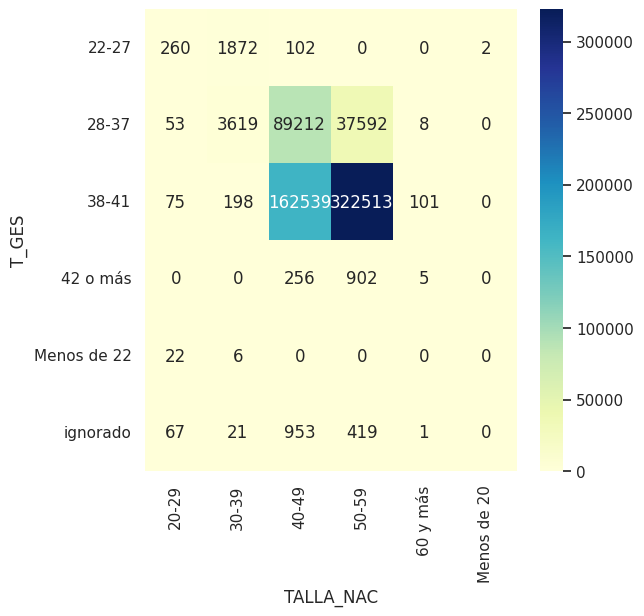

In [40]:
#Graficamente podemos representar la tabla de contingencia atraves de la función heatmap
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

#Explicación
# fmt = 'd' -> resultados en enteros, no en notación ciéntifica
# cmap ='YlGnBu' -> colores
# cbar=True -> en True nos muestra  la barra de frecuencias
# función seaborn -> visualización estadistica de datos.

Probabilidad asociada a la tabla de contingencia.
Ejemplo: los nacidos hayan nacido en las 38 a 41 semanas y su talla de 50 a 59 centímetros son 322513, tomando el total y realizando el cociente, la probabilidad es de 51.95%

# Prueba de hipótesis Chi-cuadrado
*  Ho : X y Y no están asociadas (son indeoendientes, son homogeneas)
*  Ha : X y Y estén asociadas ( Y dependa de X, X y Y no son homogeneas)









In [41]:
#Prueba de hipótesis (Chi-cuadrado)
# linea 3: chi, valor p, grados de libertad (como no me imteresa, una linea), frecuencia esperada
import scipy.stats as stats
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")


El valor de la estadística Chi cuadrado es 300045.3297185701 y el valor p es d 0.0


*  Si valor p < 0.05 se rechaza la hipótesis nula
*  Si valor p > 0.05 no se rechaza la hipótesis nula

Como el valor p es menor a 0.05, no se rechaza con una confianza del 95% que la talla de un nacido y el tiempo de gestación estén asociadas para los individuos recién nacidos en Colombia.

In [42]:
#Grado de asociación, independencia u homogeneidad
# coeficiente de contingencia
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
# coeficiente phi
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
# coeficiente v de Cramer
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5708218152971455, 0.6952136347963199 y 0.6952136347963199


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310), se tiene que el tiempo de gestación y la talla de un nacido en Colombia están moderadamente asociados.

*  Si es una prueba de independencia:

  Y depende moderadamente de X


*   Si es una prueba de homogeneidad:

  X y Y son moderadamente homogeneas.
*   Si es una prueba de asociación:

  X y Y están moderadamente asociadas.

En este caso, X y Y están moderadamente asociadas.

Donde:

Donde ______ = nula ($Chi, \phi, V ≈ 0$), ______ = insignificantemente ($0 < Chi, \phi, V < 0.2$), ______ = discretamente ($0.2 < Chi,\phi, V < 0.4$), ______ = moderadamente ($0.4 < Chi, \phi, V < 0.6$), ______ = sustancialmente ($0.6 < Chi, \phi, V < 0.8$) y ______ = fuertemente ($0.8 < Chi, \phi, V < 1$)

